### The climate model output can be retrieved via the same methods we worked through in unit5_models --- please refer back to that tutorial for working with CMIP6 data on Google Cloud Store and make the appropriate selection in the catalog to get your GFDL-ESM4 data that is required for the project.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colormaps

In [2]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [3]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [4]:
google_cloud_cmip6

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


### Beginning of CM4 OMON

In [5]:
gfdl_cm4_H_tos_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

gfdl_cm4_H_tos_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
8074,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701


In [6]:
gfdl_cm4_24_tos_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
     table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

gfdl_cm4_24_tos_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
2249,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp245,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701


In [7]:
gfdl_cm4_54_tos_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

gfdl_cm4_54_tos_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
866,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701


### Beginning of ESM4 OMON

In [8]:
gfdl_ESM4_h_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

gfdl_ESM4_h_data 

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
244695,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726


In [9]:
gfdl_esm4_tos_58_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

gfdl_esm4_tos_58_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [10]:
gfdl_esm4_tos_24_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1' & \
    grid_label == 'gr1' "
)

gfdl_esm4_tos_24_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15454,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


### Beginning of NCARR OMON

In [11]:
NCAR_CESM2_tos_24_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1' "
)

NCAR_CESM2_tos_24_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
249726,ScenarioMIP,NCAR,CESM2-WACCM,ssp245,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/...,NaN,20190815


In [12]:
NCAR_CESM2_tos_58_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1' "
)

NCAR_CESM2_tos_58_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
458559,ScenarioMIP,NCAR,CESM2-WACCM,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/...,NaN,20200702


In [13]:
NCAR_CESM2_h_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1' "
)

NCAR_CESM2_h_data 

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
56326,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227


# Beginning of load in 2

### Load in for GFDL CM4

In [14]:
gfdl_cm4_H_tao_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    variable_id == 'ta' & \
    table_id == 'Amon' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1' "
)

gfdl_cm4_H_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
6728,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701


In [15]:
gfdl_cm4_245_tao_data =  google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1'  "
)
gfdl_cm4_245_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
2250,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp245,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701


In [16]:
gfdl_cm4_54_tao_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1'  "
)

gfdl_cm4_54_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
850,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701


### Load in ESM4

In [17]:
gfdl_ESM4_H_tao_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1'  "
)

gfdl_ESM4_H_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
244701,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726


In [18]:
gfdl_ESM4_245_tao_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1' "
)

gfdl_ESM4_245_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15395,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [19]:
gfdl_ESM4_585_tao_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1' "
)

gfdl_ESM4_585_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
19007,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,ta,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


### Load In NCAR

In [20]:
NCAR_CESM2_585_tao_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp585' & \
    member_id == 'r1i1p1f1' "
)

NCAR_CESM2_585_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
458594,ScenarioMIP,NCAR,CESM2-WACCM,ssp585,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/...,NaN,20200702


In [21]:
NCAR_CESM2_245_tao_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'ssp245' & \
    member_id == 'r1i1p1f1' "
)

NCAR_CESM2_245_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
249724,ScenarioMIP,NCAR,CESM2-WACCM,ssp245,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/...,NaN,20190815


In [22]:
NCAR_CESM2_H_tao_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'Amon' & \
    variable_id == 'ta' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1'  "
)

NCAR_CESM2_H_tao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
56327,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227


## Load In 3

In [23]:
NCAR_CESM2_H_fx_data = google_cloud_cmip6.query(
    "source_id == 'CESM2-WACCM' & \
    table_id == 'fx' & \
    variable_id == 'sftlf' & \
    experiment_id == 'historical' & \
    member_id == 'r1i1p1f1'  "
)

NCAR_CESM2_H_fx_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
55980,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,fx,sftlf,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227


In [24]:
gfdl_ESM4_h_fx_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-ESM4' & \
    table_id == 'fx' & \
    experiment_id == 'land-hist' & \
    variable_id == 'sftlf' & \
    member_id == 'r1i1p1f1' "
)

gfdl_ESM4_h_fx_data 

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
19688,LUMIP,NOAA-GFDL,GFDL-ESM4,land-hist,r1i1p1f1,fx,sftlf,gr1,gs://cmip6/CMIP6/LUMIP/NOAA-GFDL/GFDL-ESM4/lan...,NaN,20180701


In [25]:
gfdl_CM4_h_fx_data = google_cloud_cmip6.query(
    "source_id == 'GFDL-CM4' & \
    table_id == 'fx' & \
    experiment_id == 'historical' & \
    variable_id == 'sftlf' & \
    grid_label == 'gr1' &\
    member_id == 'r1i1p1f1' "
)

gfdl_CM4_h_fx_data 

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9517,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,fx,sftlf,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701


# Convert to zarr

In [26]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [27]:
zstore_gfdl_cm4_H_tos = gfdl_cm4_H_tos_data.zstore.values[-1]

zstore_gfdl_cm4_H_tos

# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_H_tos = gcs.get_mapper(zstore_gfdl_cm4_H_tos)
# open the dataset using xarray and zarr
gfdl_cm4_H_tos = xr.open_zarr(mapper_gfdl_cm4_H_tos, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_H_tos

<xarray.DataArray 'tas' (time: 1980, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1980, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [28]:
zstore_gfdl_cm4_24_tos = gfdl_cm4_24_tos_data.zstore.values[-1]

zstore_gfdl_cm4_24_tos 

# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_24_tos = gcs.get_mapper(zstore_gfdl_cm4_24_tos )
# open the dataset using xarray and zarr
gfdl_cm4_24_tos = xr.open_zarr(mapper_gfdl_cm4_24_tos, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_24_tos

<xarray.DataArray 'tas' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [29]:
zstore_gfdl_cm4_54_to = gfdl_cm4_54_tos_data.zstore.values[-1]

zstore_gfdl_cm4_54_to 

# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_54_to = gcs.get_mapper(zstore_gfdl_cm4_54_to )
# open the dataset using xarray and zarr
gfdl_cm4_54_to = xr.open_zarr(mapper_gfdl_cm4_54_to, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_54_to

<xarray.DataArray 'tas' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [30]:
zstore_gfdl_ESM4_h = gfdl_ESM4_h_data.zstore.values[-1]

zstore_gfdl_ESM4_h

# create a mutable-mapping-style interface to the store
mapper_gfdl_ESM4_h_to = gcs.get_mapper(zstore_gfdl_ESM4_h )
# open the dataset using xarray and zarr
gfdl_ESM4_h_to = xr.open_zarr(mapper_gfdl_ESM4_h_to, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_ESM4_h_to

<xarray.DataArray 'tas' (time: 1980, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1980, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [31]:
zstore_gfdl_esm4_tos_58 = gfdl_esm4_tos_58_data.zstore.values[-1]

zstore_gfdl_esm4_tos_58

# create a mutable-mapping-style interface to the store
mapper_gfdl_esm4_tos_58 = gcs.get_mapper(zstore_gfdl_esm4_tos_58)
# open the dataset using xarray and zarr
gfdl_esm4_tos_58 = xr.open_zarr(mapper_gfdl_esm4_tos_58, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_tos_58

<xarray.DataArray 'tas' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 180, 288), dtype=float32, chunksize=(862, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [32]:
zstore_gfdl_esm4_tos_24 = gfdl_esm4_tos_24_data.zstore.values[-1]

zstore_gfdl_esm4_tos_24

# create a mutable-mapping-style interface to the store
mapper_gfdl_esm4_tos_24 = gcs.get_mapper(zstore_gfdl_esm4_tos_24)
# open the dataset using xarray and zarr
gfdl_esm4_tos_24 = xr.open_zarr(mapper_gfdl_esm4_tos_24, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_tos_24

<xarray.DataArray 'tas' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 180, 288), dtype=float32, chunksize=(862, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [33]:
zstore_NCAR_CESM2_tos_24 = NCAR_CESM2_tos_24_data.zstore.values[-1]

zstore_NCAR_CESM2_tos_24

# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_tos_24 = gcs.get_mapper(zstore_NCAR_CESM2_tos_24)
# open the dataset using xarray and zarr
NCAR_CESM2_tos_24= xr.open_zarr(mapper_NCAR_CESM2_tos_24, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_tos_24

<xarray.DataArray 'tas' (time: 1032, latitude: 192, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 192, 288), dtype=float32, chunksize=(600, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [34]:
zstore_NCAR_CESM2_tos_58 = NCAR_CESM2_tos_58_data.zstore.values[-1]

zstore_NCAR_CESM2_tos_58

# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_tos_58 = gcs.get_mapper(zstore_NCAR_CESM2_tos_58)
# open the dataset using xarray and zarr
NCAR_CESM2_tos_58 = xr.open_zarr(mapper_NCAR_CESM2_tos_58, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_tos_58

<xarray.DataArray 'tas' (time: 1032, latitude: 192, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 192, 288), dtype=float32, chunksize=(600, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [35]:
zstore_NCAR_CESM2_h = NCAR_CESM2_h_data .zstore.values[-1]

zstore_NCAR_CESM2_h

# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_h = gcs.get_mapper(zstore_NCAR_CESM2_h)
# open the dataset using xarray and zarr
NCAR_CESM2_h = xr.open_zarr(mapper_NCAR_CESM2_h, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_h

<xarray.DataArray 'tas' (time: 1980, latitude: 192, longitude: 288)>
dask.array<open_dataset-tas, shape=(1980, 192, 288), dtype=float32, chunksize=(600, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

## ZARR 2 begins

In [36]:
zstore_gfdl_cm4_H_tao = gfdl_cm4_H_tao_data.zstore.values[-1]

zstore_gfdl_cm4_H_tao

# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_H_tao = gcs.get_mapper(zstore_gfdl_cm4_H_tao)
# open the dataset using xarray and zarr
gfdl_cm4_H_tao = xr.open_zarr(mapper_gfdl_cm4_H_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_H_tao

<xarray.DataArray 'ta' (time: 1980, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1980, 19, 180, 288), dtype=float32, chunksize=(60, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [37]:
zstore_gfdl_cm4_245_tao = gfdl_cm4_245_tao_data.zstore.values[-1]

zstore_gfdl_cm4_245_tao

# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_245_tao = gcs.get_mapper(zstore_gfdl_cm4_245_tao)
# open the dataset using xarray and zarr
gfdl_cm4_245_tao = xr.open_zarr(mapper_gfdl_cm4_245_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_245_tao

<xarray.DataArray 'ta' (time: 1032, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1032, 19, 180, 288), dtype=float32, chunksize=(30, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [38]:
zstore_gfdl_cm4_58_tao_data = gfdl_cm4_54_tao_data.zstore.values[-1]

zstore_gfdl_cm4_58_tao_data 

# create a mutable-mapping-style interface to the store
mapper_gfdl_cm4_58_tao = gcs.get_mapper(zstore_gfdl_cm4_58_tao_data )
# open the dataset using xarray and zarr
gfdl_cm4_58_tao = xr.open_zarr(mapper_gfdl_cm4_58_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_cm4_58_tao

<xarray.DataArray 'ta' (time: 1032, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1032, 19, 180, 288), dtype=float32, chunksize=(30, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [39]:
zstore_gfdl_ESM4_H_tao = gfdl_ESM4_H_tao_data.zstore.values[-1]

zstore_gfdl_ESM4_H_tao

# create a mutable-mapping-style interface to the store
mapper_gfdl_ESM4_H_tao = gcs.get_mapper(zstore_gfdl_ESM4_H_tao )
# open the dataset using xarray and zarr
gfdl_ESM4_H_tao = xr.open_zarr(mapper_gfdl_ESM4_H_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_ESM4_H_tao

<xarray.DataArray 'ta' (time: 1980, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1980, 19, 180, 288), dtype=float32, chunksize=(30, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [40]:
zstore_gfdl_ESM4_245_tao = gfdl_ESM4_245_tao_data.zstore.values[-1]

zstore_gfdl_ESM4_245_tao

# create a mutable-mapping-style interface to the store
mapper_gfdl_ESM4_245_tao = gcs.get_mapper(zstore_gfdl_ESM4_245_tao )
# open the dataset using xarray and zarr
gfdl_ESM4_245_tao = xr.open_zarr(mapper_gfdl_ESM4_245_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_ESM4_245_tao

<xarray.DataArray 'ta' (time: 1032, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1032, 19, 180, 288), dtype=float32, chunksize=(51, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [41]:
zstore_gfdl_ESM4_585_tao = gfdl_ESM4_585_tao_data.zstore.values[-1]

zstore_gfdl_ESM4_585_tao

# create a mutable-mapping-style interface to the store
mapper_gfdl_ESM4_585_tao = gcs.get_mapper(zstore_gfdl_ESM4_585_tao)
# open the dataset using xarray and zarr
gfdl_ESM4_585_tao = xr.open_zarr(mapper_gfdl_ESM4_585_tao, 
                      consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_ESM4_585_tao

<xarray.DataArray 'ta' (time: 1032, plev: 19, latitude: 180, longitude: 288)>
dask.array<open_dataset-ta, shape=(1032, 19, 180, 288), dtype=float32, chunksize=(51, 19, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: mean
    interp_method:  conserve_order2
    long_name:      Air Temperature
    original_name:  ta
    standard_name:  air_temperature
    units:          K

In [42]:
zstore_NCAR_CESM2_245_ta = NCAR_CESM2_245_tao_data.zstore.values[-1]

zstore_NCAR_CESM2_245_ta

# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_245_ta = gcs.get_mapper(zstore_NCAR_CESM2_245_ta)
# open the dataset using xarray and zarr
NCAR_CESM2_245_ta = xr.open_zarr(mapper_NCAR_CESM2_245_ta, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_245_ta

<xarray.DataArray 'ta' (time: 1032, plev: 19, latitude: 192, longitude: 288)>
dask.array<open_dataset-ta, shape=(1032, 19, 192, 288), dtype=float32, chunksize=(30, 19, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   time: mean
    comment:        vinth2p(T,hyam, hybm, plev, PS, P0)
    description:    Air Temperature
    frequency:      mon
    id:             ta
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Air Temperature
    type:           real
    units:          K
    variable_id:    ta

In [43]:
zstore_NCAR_CESM2_585_tao = NCAR_CESM2_585_tao_data.zstore.values[-1]

zstore_NCAR_CESM2_585_tao 

# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_585_tao = gcs.get_mapper(zstore_NCAR_CESM2_585_tao)
# open the dataset using xarray and zarr
NCAR_CESM2_585_tao = xr.open_zarr(mapper_NCAR_CESM2_585_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_585_tao

<xarray.DataArray 'ta' (time: 3420, plev: 19, latitude: 192, longitude: 288)>
dask.array<open_dataset-ta, shape=(3420, 19, 192, 288), dtype=float32, chunksize=(24, 19, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 2015-01-15 12:00:00 ... 2299-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   time: mean
    comment:        Air Temperature
    description:    Air Temperature
    frequency:      mon
    id:             ta
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Air Temperature
    type:           real
    units:          K
    variable_id:    ta

In [44]:
zstore_NCAR_CESM2_H_tao = NCAR_CESM2_H_tao_data.zstore.values[-1]

zstore_NCAR_CESM2_H_tao

# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_H_tao = gcs.get_mapper(zstore_NCAR_CESM2_H_tao)
# open the dataset using xarray and zarr
NCAR_CESM2_H_tao = xr.open_zarr(mapper_NCAR_CESM2_H_tao, 
                                consolidated=True,use_cftime=True).ta.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_H_tao

<xarray.DataArray 'ta' (time: 1980, plev: 19, latitude: 192, longitude: 288)>
dask.array<open_dataset-ta, shape=(1980, 19, 192, 288), dtype=float32, chunksize=(60, 19, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   time: mean
    comment:        Air Temperature
    description:    Air Temperature
    frequency:      mon
    id:             ta
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Air Temperature
    type:           real
    units:          K
    variable_id:    ta

# Load In 3 

In [45]:
zstore_NCAR_CESM2_H_fx = NCAR_CESM2_H_fx_data.zstore.values[-1]

zstore_NCAR_CESM2_H_fx

# create a mutable-mapping-style interface to the store
mapper_NCAR_CESM2_H_fx = gcs.get_mapper(zstore_NCAR_CESM2_H_fx)
# open the dataset using xarray and zarr
NCAR_CESM2_H_fx = xr.open_zarr(mapper_NCAR_CESM2_H_fx, 
                                consolidated=True,use_cftime=True).sftlf.rename({'lat':'latitude',
                                                             'lon':'longitude'})
NCAR_CESM2_H_fx

<xarray.DataArray 'sftlf' (latitude: 192, longitude: 288)>
dask.array<open_dataset-sftlf, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Attributes: (12/18)
    cell_measures:  area: areacella
    cell_methods:   area: mean
    comment:        Please express "X_area_fraction" as the percentage of hor...
    description:    Please express "X_area_fraction" as the percentage of hor...
    frequency:      fx
    id:             sftlf
    ...             ...
    time_label:     None
    time_title:     No temporal dimensions ... fixed field
    title:          Percentage of the grid  cell occupied by land (including ...
    type:           real
    units:          %
    variable_id:    sftlf

In [46]:
zstore_gfdl_ESM4_h_fx_data =gfdl_ESM4_h_fx_data .zstore.values[-1] 

zstore_gfdl_ESM4_h_fx_data

# create a mutable-mapping-style interface to the store
mapper_gfdl_ESM4_h_fx_data = gcs.get_mapper(zstore_gfdl_ESM4_h_fx_data)
# open the dataset using xarray and zarr
gfdl_ESM4_h_fx_data= xr.open_zarr(mapper_gfdl_ESM4_h_fx_data, 
                                consolidated=True,use_cftime=True).sftlf.rename({'lat':'latitude',
                      'lon':'longitude'})
gfdl_ESM4_h_fx_data

<xarray.DataArray 'sftlf' (latitude: 180, longitude: 288)>
dask.array<open_dataset-sftlf, shape=(180, 288), dtype=float32, chunksize=(180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
Attributes:
    cell_measures:    area: areacella
    cell_methods:     area: mean
    interp_method:    conserve_order1
    long_name:        Land Area Fraction
    ocean_fillvalue:  0.0
    original_name:    sftlf
    standard_name:    land_area_fraction
    units:            %

In [47]:
zstore_gfdl_CM4_h_fx = gfdl_CM4_h_fx_data .zstore.values[-1]

zstore_gfdl_CM4_h_fx

# create a mutable-mapping-style interface to the store
mapper_gfdl_CM4_h_fx = gcs.get_mapper(zstore_gfdl_CM4_h_fx)
# open the dataset using xarray and zarr
gfdl_CM4_h_fx = xr.open_zarr(mapper_gfdl_CM4_h_fx, 
                                consolidated=True,use_cftime=True).sftlf.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_CM4_h_fx

<xarray.DataArray 'sftlf' (latitude: 180, longitude: 288)>
dask.array<open_dataset-sftlf, shape=(180, 288), dtype=float32, chunksize=(180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
Attributes:
    cell_measures:    area: areacella
    cell_methods:     area: mean
    interp_method:    conserve_order1
    long_name:        Land Area Fraction
    ocean_fillvalue:  0.0
    original_name:    sftlf
    standard_name:    land_area_fraction
    units:            %

## Beginning of Project Visualizations

In [48]:
GFDL_CM4_baseline = gfdl_cm4_H_tos.sel(time=slice('1995-01-06','2014-12-16')).mean(dim='time')

GFDL_ESM4_baseline = gfdl_ESM4_h_to.sel(time=slice('1994-01-06','2014-12-16')).mean(dim='time')

GFDl_CM4_SSP245= gfdl_cm4_24_tos.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time')

GFDl_CM4_SSP585= gfdl_cm4_54_to.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time')

GFDl_ESM4_SSP585= gfdl_esm4_tos_58.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time')

GFDl_ESM4_SSP245 = gfdl_esm4_tos_24.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time')

In [49]:
GFDL_CM4_diff_SSP245= (GFDl_CM4_SSP245 - GFDL_CM4_baseline)

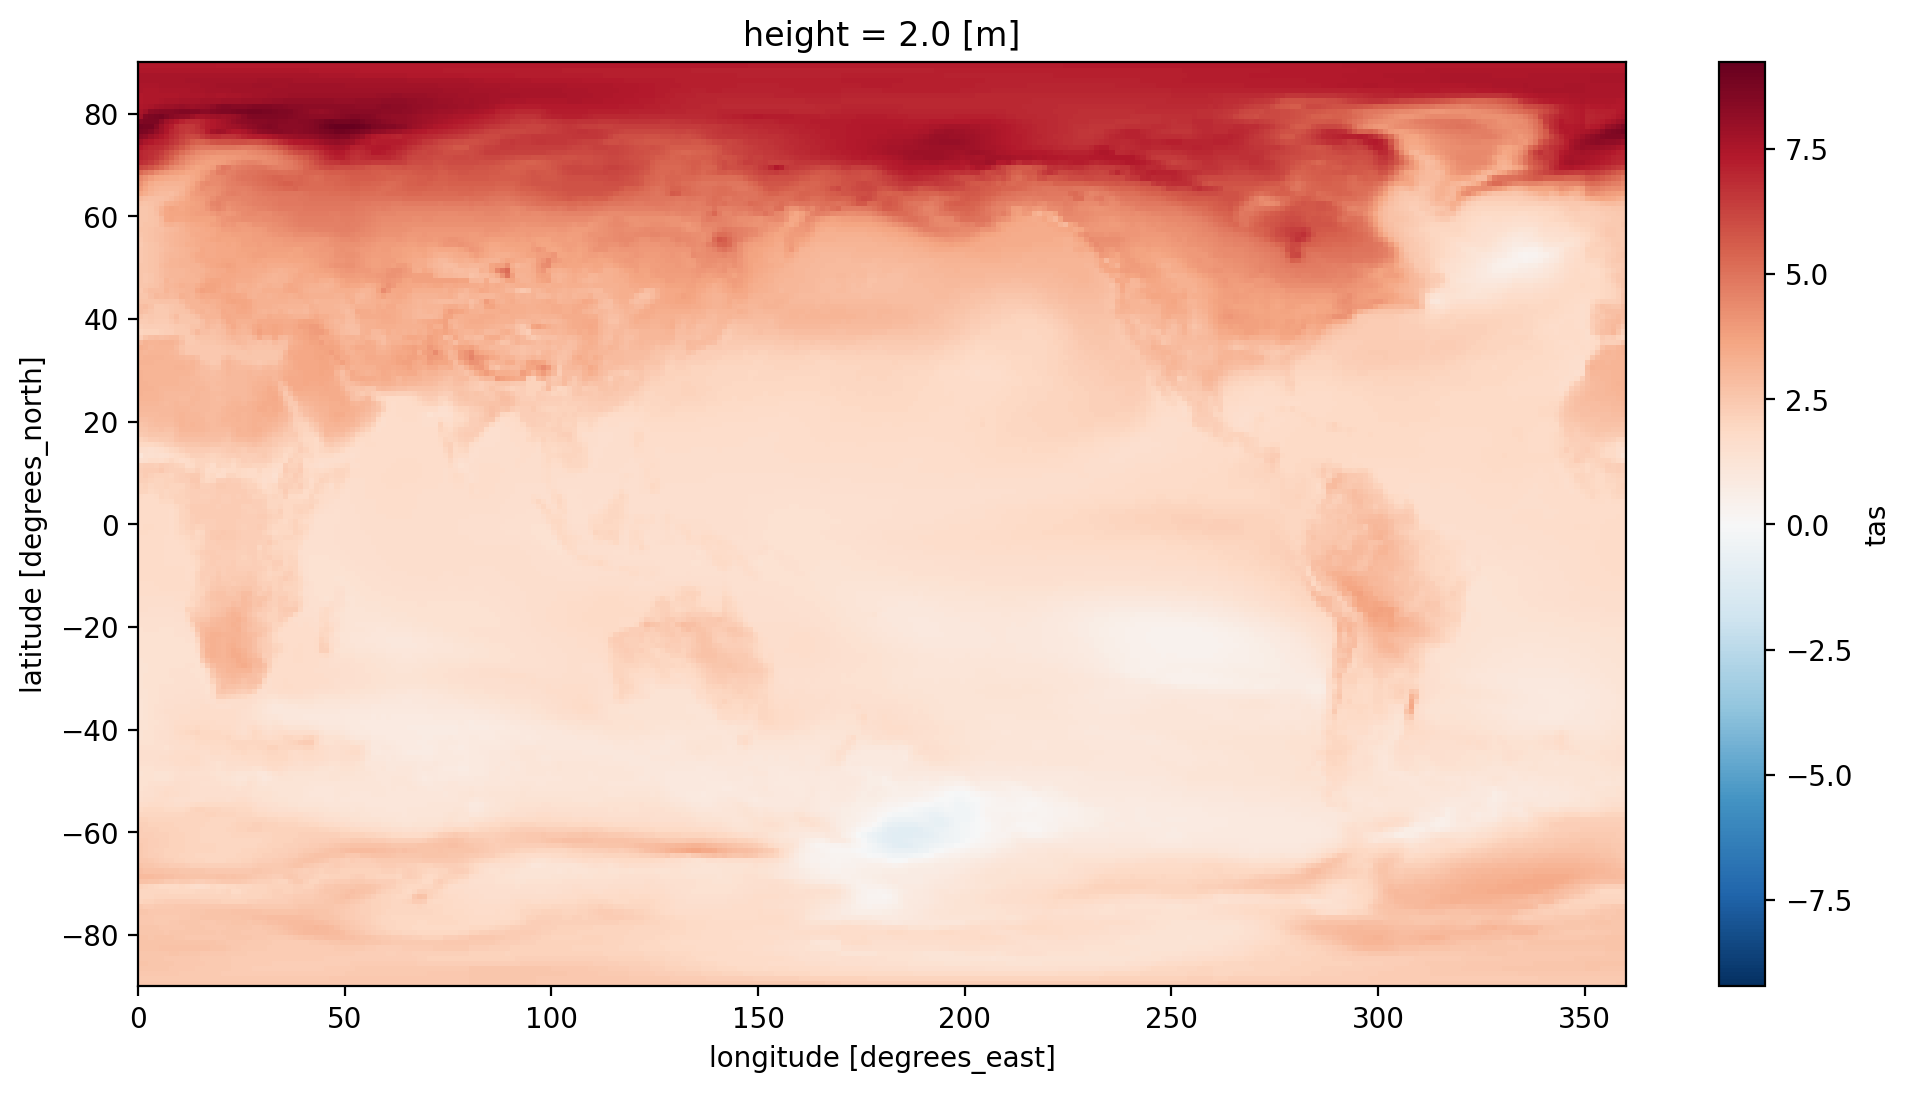

In [50]:
GFDL_CM4_diff_SSP245.plot()

In [51]:
GFDL_CM4_diff_SSP585= (GFDl_CM4_SSP585 - GFDL_CM4_baseline)

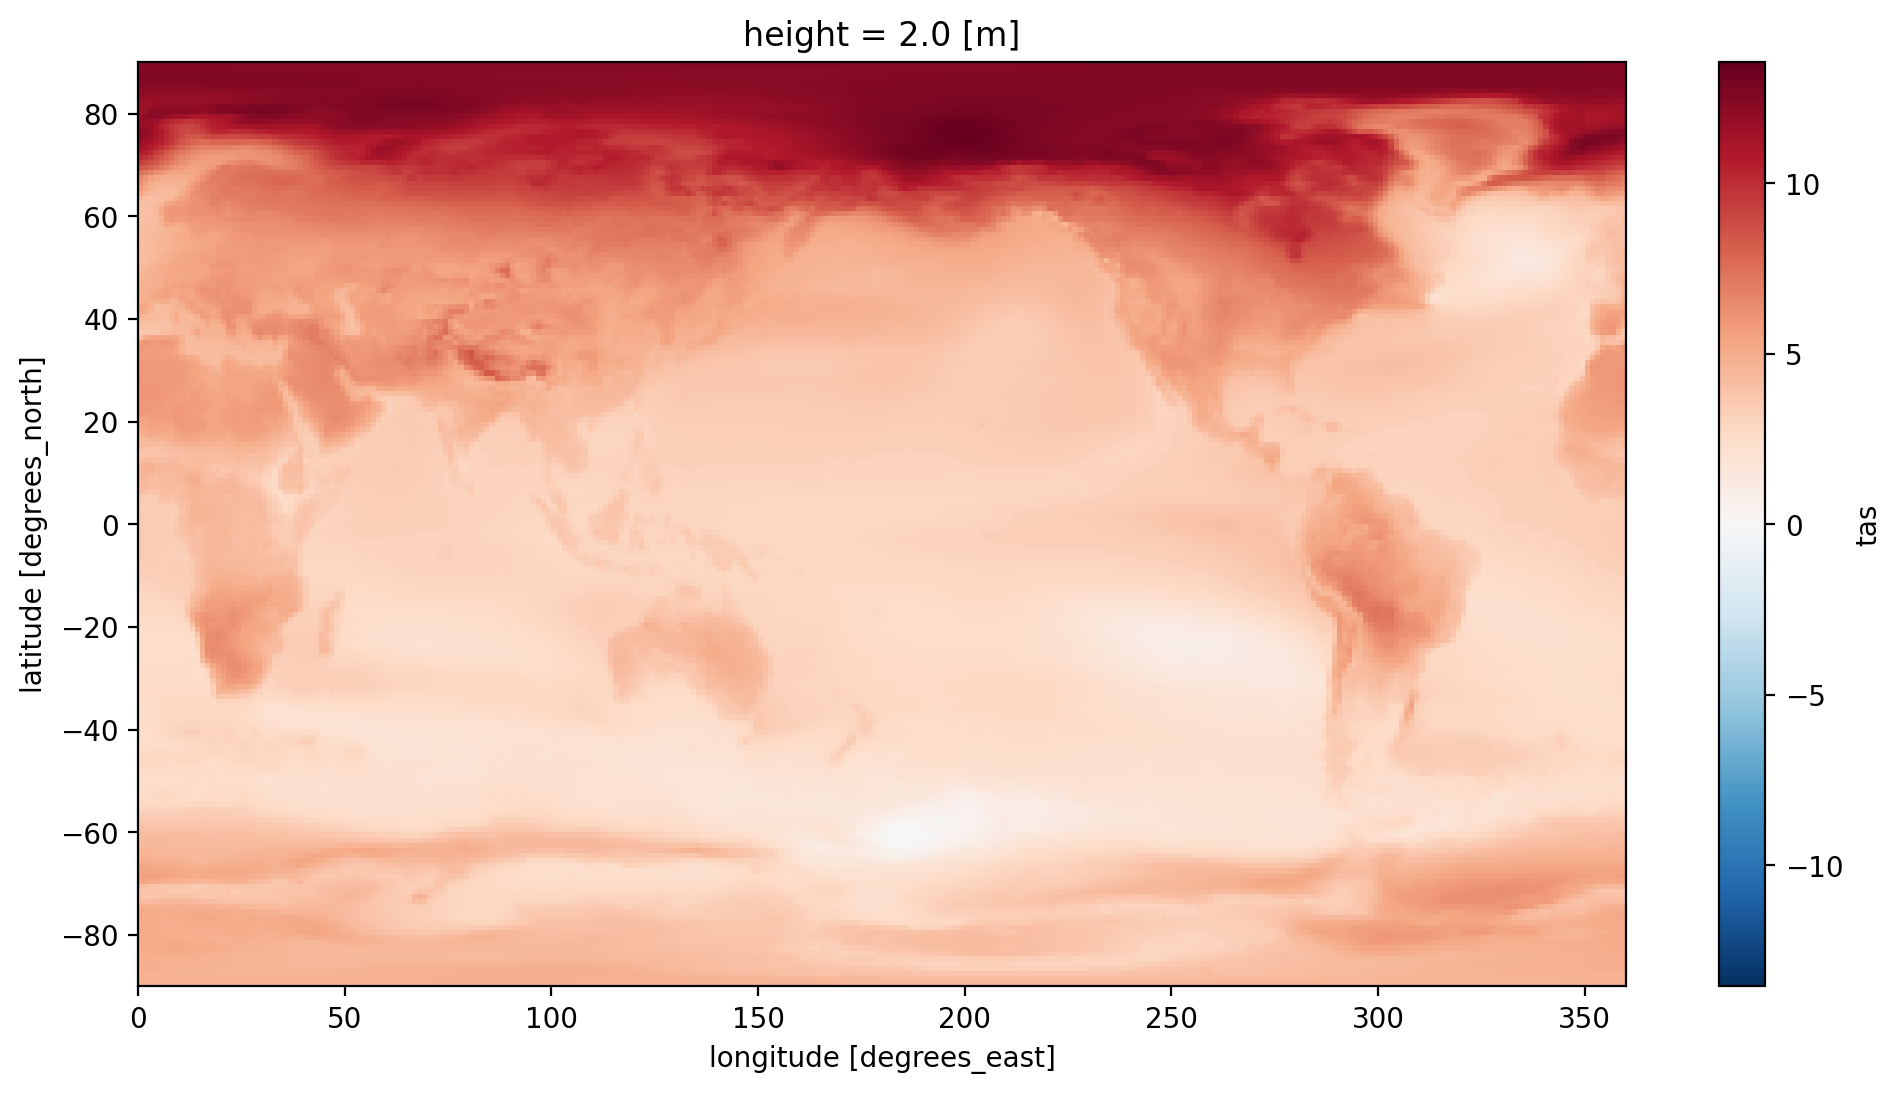

In [52]:
GFDL_CM4_diff_SSP585.plot()

In [53]:
GFDL_ESM4_diff_SSP585= (GFDl_ESM4_SSP245 - GFDL_ESM4_baseline)

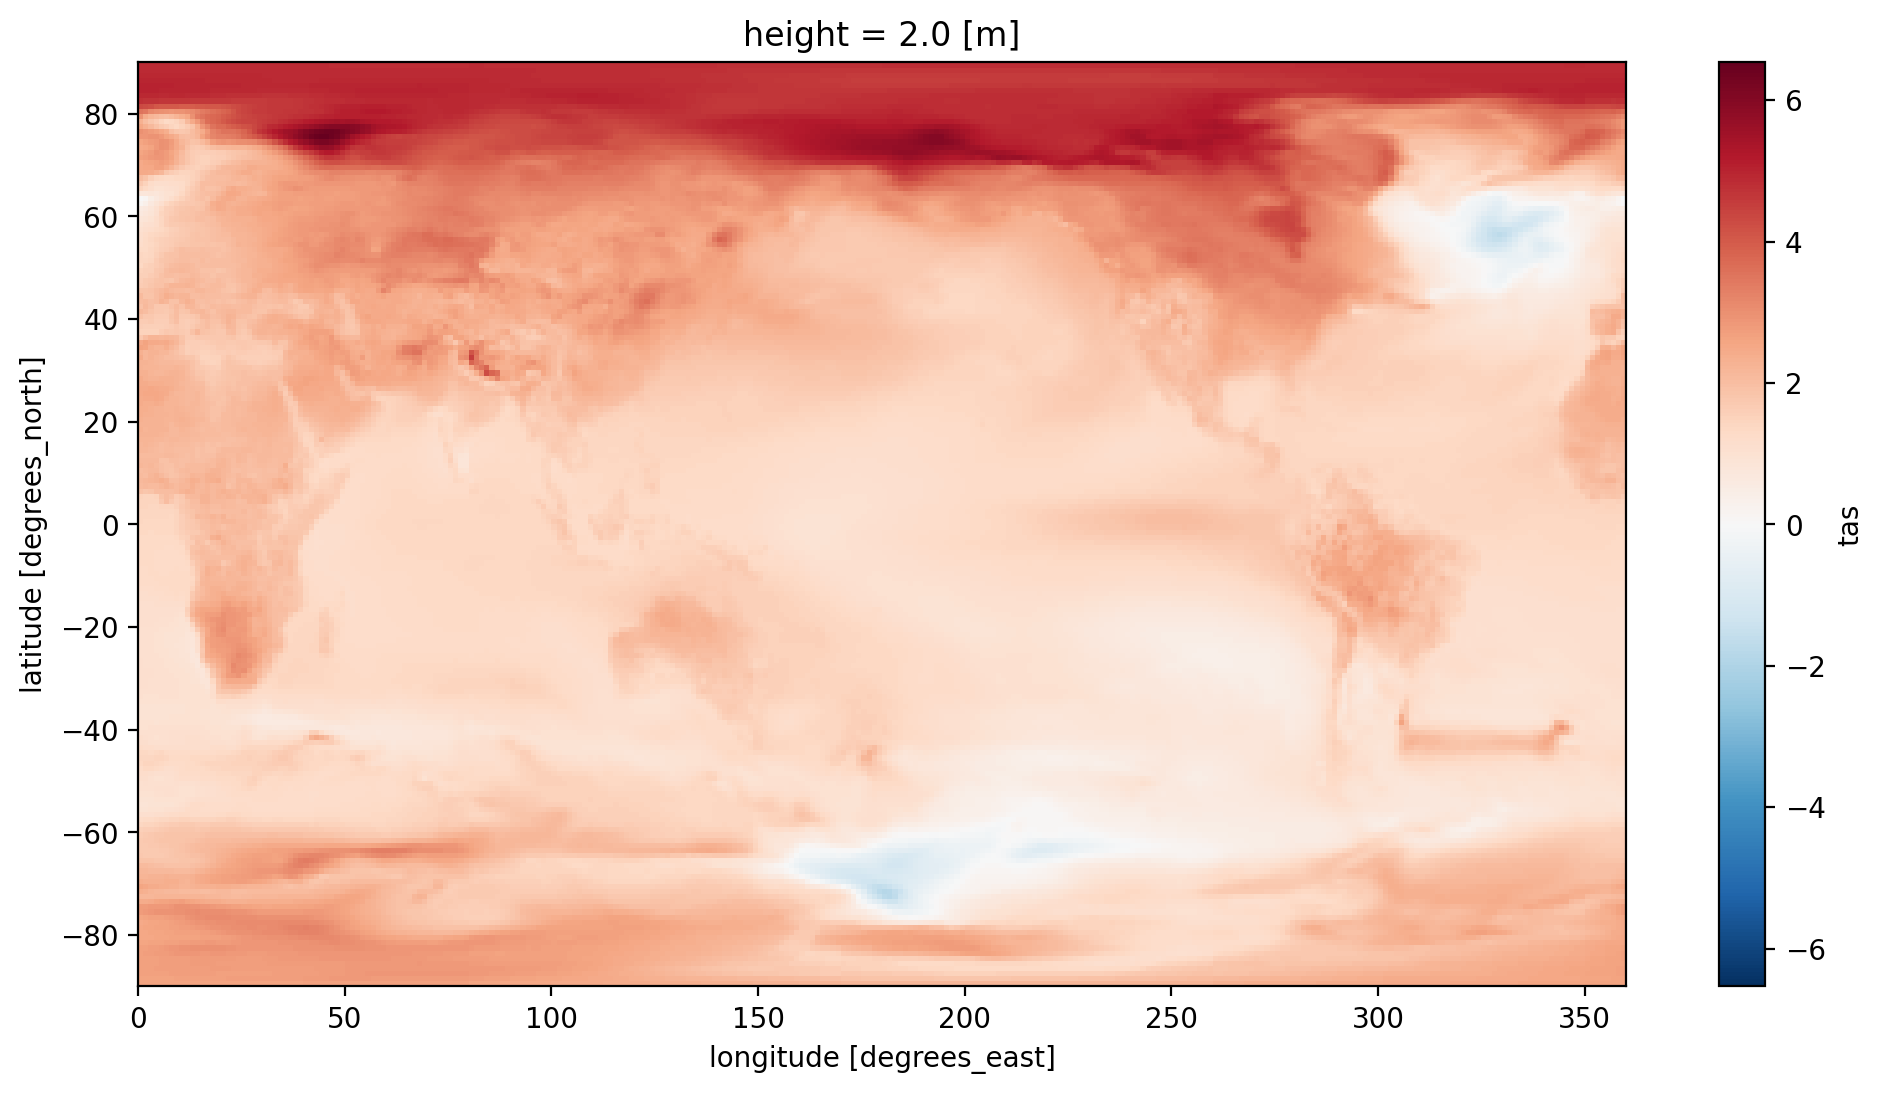

In [54]:
GFDL_ESM4_diff_SSP585.plot()

In [55]:
GFDL_ESM4_diff_SSP245= (GFDl_ESM4_SSP585 - GFDL_ESM4_baseline)

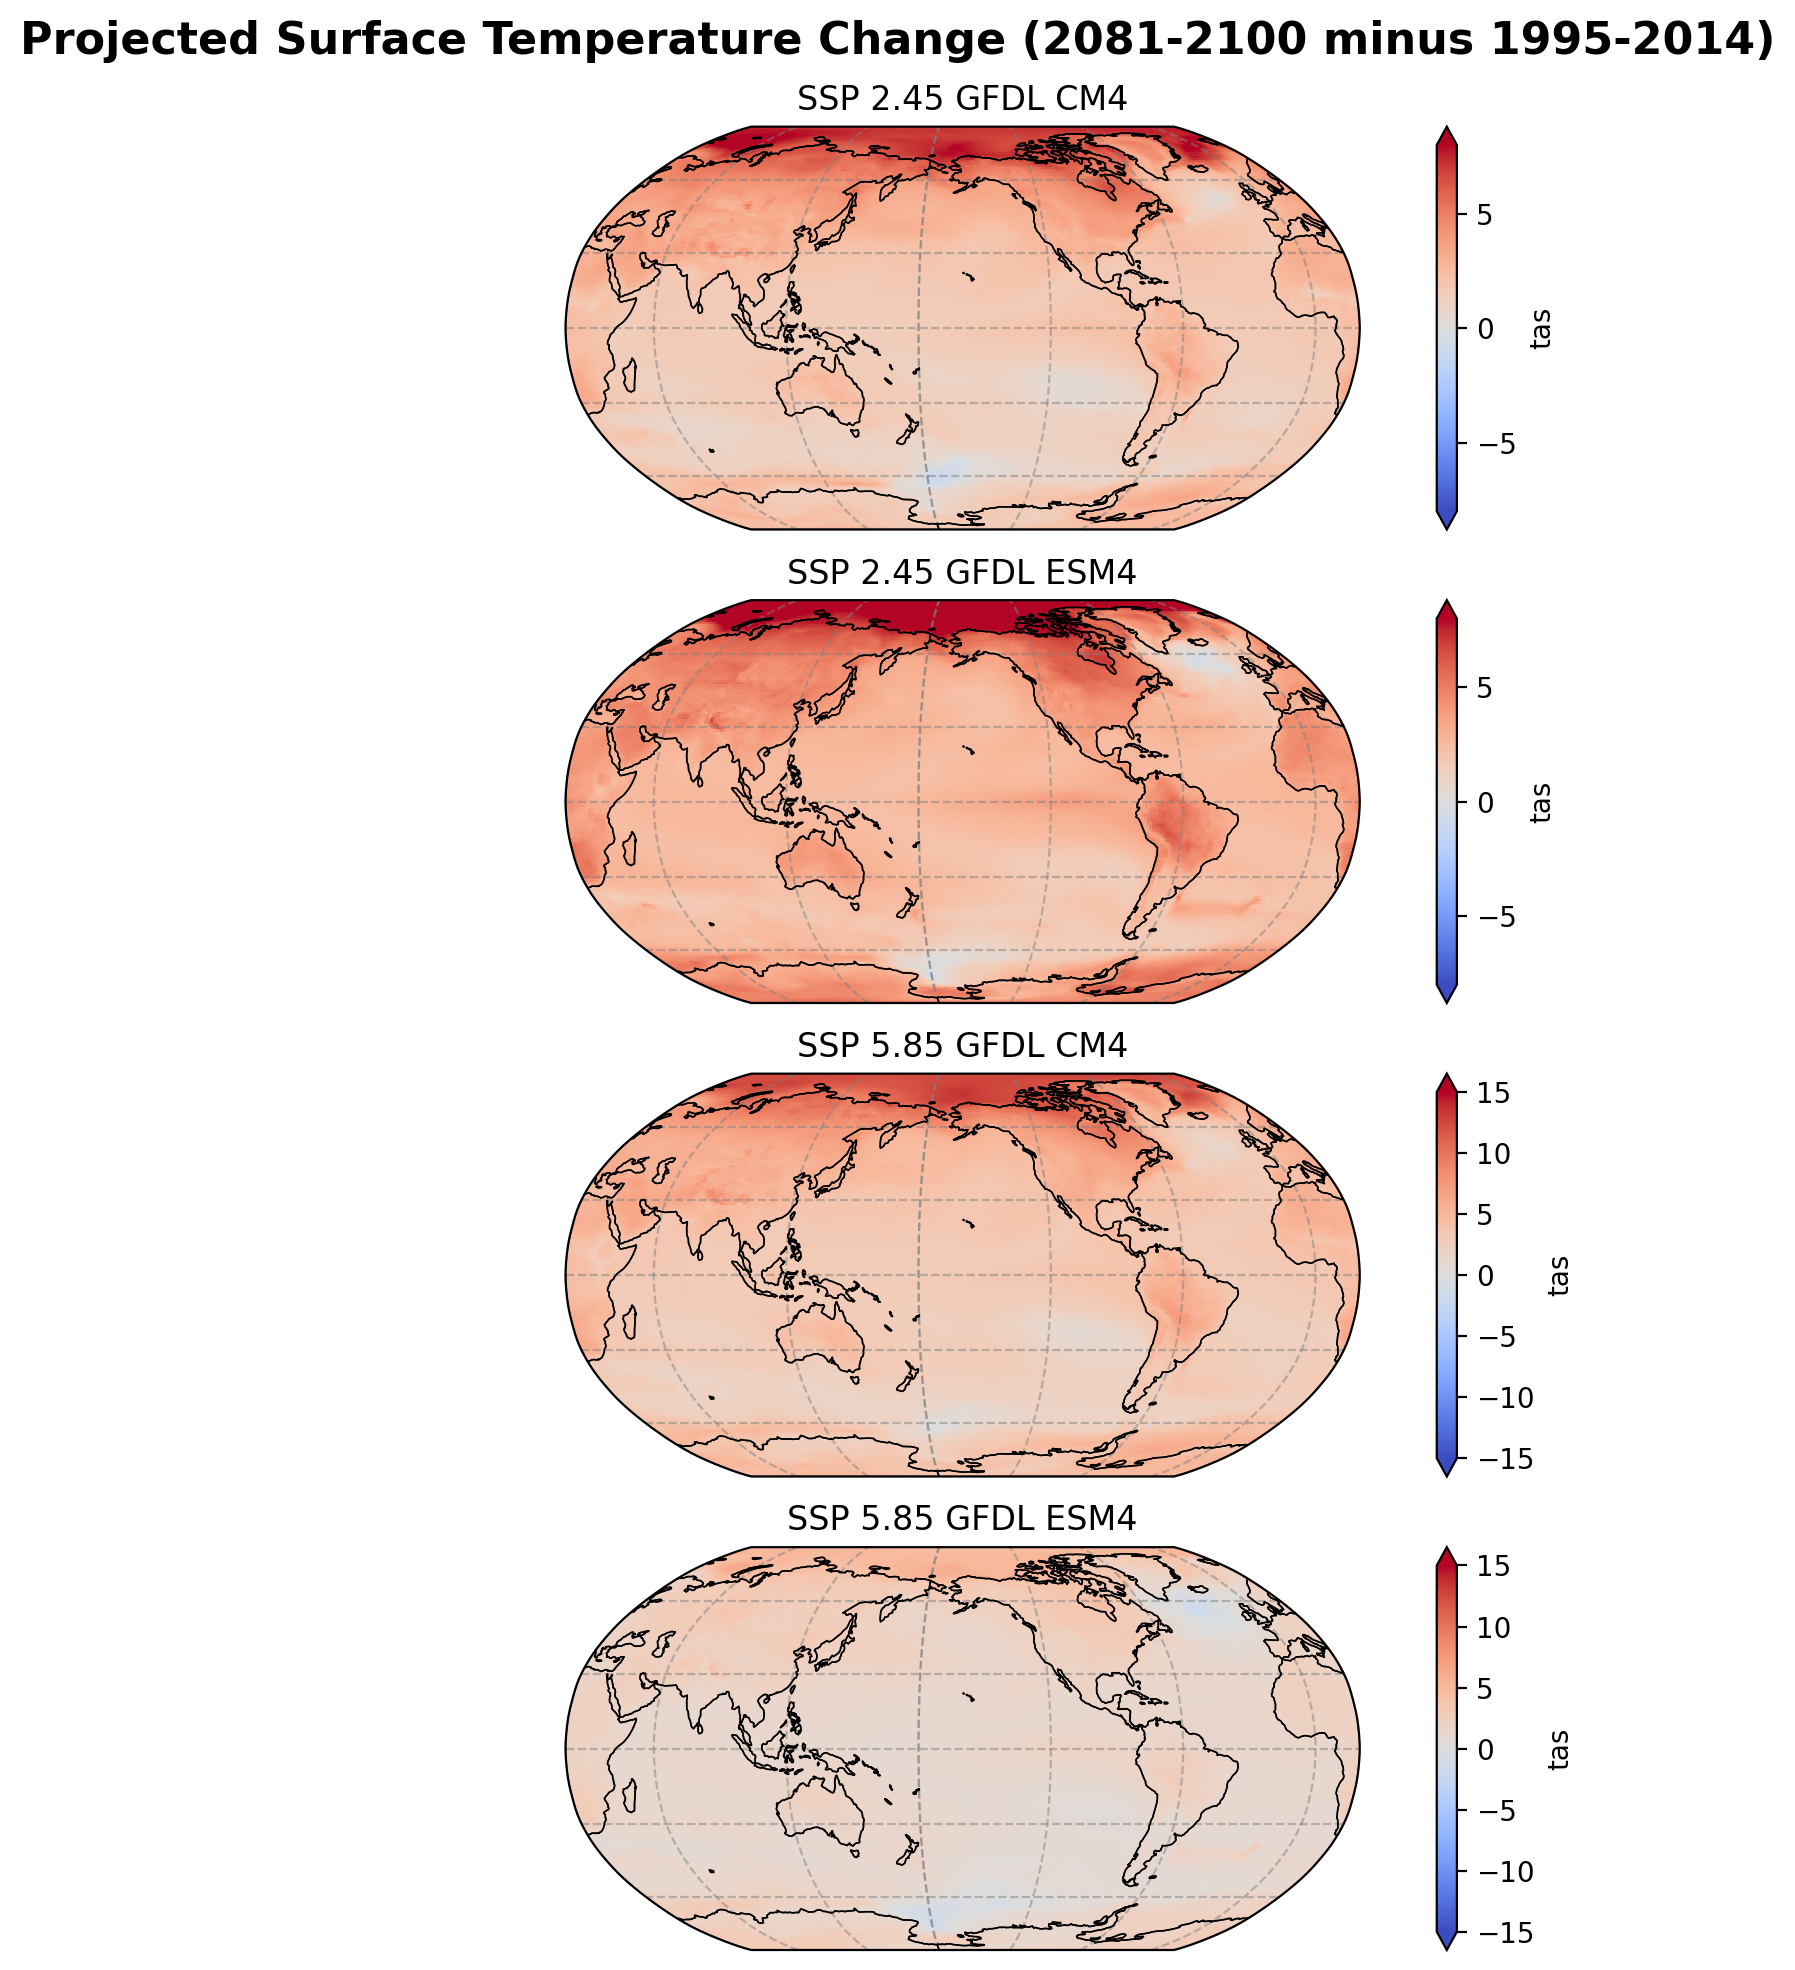

In [56]:
subplot_kws=dict(projection=ccrs.Robinson(central_longitude=-160),
                 facecolor='grey')

### set up our figure settings
fig, ax = plt.subplots(ncols=1,
                               nrows=4,
                               figsize=(8,10),
                               subplot_kw=subplot_kws) ## set up our plotting area
ax1, ax2, ax3, ax4 = ax

for ax in [ax1, ax2, ax3, ax4]:
    # Draw the actual coastlines a bit thicker
    ax.coastlines(color='black', linewidth=0.6, zorder=3)

    # explicit land polygons with outlines
    ax.add_feature(
        cfeature.LAND,
        facecolor='none',      # don't fill, just outline
        edgecolor='black',
        linewidth=0.5,
        zorder=3
    )
fig.suptitle("Projected Surface Temperature Change (2081-2100 minus 1995-2014)", 
             fontsize=16,
             fontweight='bold')

### plot our data
GFDL_CM4_diff_SSP245.plot(ax=ax1, 
                                cmap='coolwarm', 
                                vmin=-8,vmax=8, extend='both',
                                transform=ccrs.PlateCarree())

GFDL_CM4_diff_SSP585.plot(ax=ax3, 
                                cmap='coolwarm', 
                                vmin=-15,vmax=15,extend='both',
                                transform=ccrs.PlateCarree())

GFDL_ESM4_diff_SSP245.plot(ax=ax2, 
                                cmap='coolwarm', 
                                vmin=-8,vmax=8,extend='both',
                                transform=ccrs.PlateCarree())

GFDL_ESM4_diff_SSP585.plot(ax=ax4, 
                                cmap='coolwarm', 
                                vmin=-15,vmax=15,extend='both',
                                transform=ccrs.PlateCarree())
## customize our subplots
ax1.set_title('SSP 2.45 GFDL CM4')
ax3.set_title('SSP 5.85 GFDL CM4')
ax2.set_title('SSP 2.45 GFDL ESM4')
ax4.set_title('SSP 5.85 GFDL ESM4')

plt.tight_layout() ## make it look nicely spaced!

### add some gridlines 
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')
ax3.gridlines(color='grey', alpha=0.5, linestyle='--')
ax4.gridlines(color='grey', alpha=0.5, linestyle='--')

In [57]:
# The following function is used to create weights for the Earths grid space.
import warnings 

def standard_grid_cell_area(lat, lon, rE=6371.0e3):
    """ computes the cell area for a standard spherical grid """

    dLat = lat[1] - lat[0]
    dLon = lon[1] - lon[0]
    area = np.empty((len(lat), len(lon)))
    for j in range(0, len(lat)):
        for i in range(0, len(lon)):
            lon1 = lon[i] + dLon / 2
            lon0 = lon[i] - dLon / 2
            lat1 = lat[j] + dLat / 2
            lat0 = lat[j] - dLat / 2
            area[j, i] = (
                (np.pi / 180.0)
                * rE
                * rE
                * np.abs(np.sin(np.radians(lat0)) - np.sin(np.radians(lat1)))
                * np.abs(lon0 - lon1)
            )
    return area

In [58]:
gfdl_cm4_H_lat = gfdl_cm4_H_tos.coords['latitude'].values #1-D numpy array of model's latitude values
gfdl_cm4_H_lon =  gfdl_cm4_H_tos.coords['longitude'].values #1-D numpy array of model's longitude values

# make sure to replace the name of the data array if you chose a 
# different name and use the appropriate coordinate names within the ['']
# based on the coordinates of lat / lon in your dataset.

# Pass the arrays to the standard_grid_cell_area function
areacell_gfdl_cm4_H = standard_grid_cell_area(gfdl_cm4_H_lat,gfdl_cm4_H_lon)  

# The areacella_xarray function outputs a numpy array. Convert this back into 
# and xarray DataArray for further use. If this is a field you will be using 
# often. You may wish to save this newly created DataArray as a Dataset and save 
# as a netcdf file.

# here we assign dimensions and coordinates that are the same as our original SST array:

areacell_xarray_cm4_H = xr.DataArray(areacell_gfdl_cm4_H ,dims=({'latitude':180,'longitude':360}),\
                                                coords=(gfdl_cm4_H_tos.coords['latitude'],\
                                                        gfdl_cm4_H_tos.coords['longitude']))

weights_cm4_H = areacell_xarray_cm4_H/areacell_xarray_cm4_H.sum()

In [59]:
wt_avg_gfdl_cm4_H= gfdl_cm4_H_tos.weighted(weights_cm4_H).mean(['latitude', 'longitude']) 
wt_avg_gfdl_ESM4_h= gfdl_ESM4_h_to.weighted(weights_cm4_H).mean(['latitude', 'longitude']) 
wt_avg_GFDl_CM4_SSP245= gfdl_cm4_24_tos.weighted(weights_cm4_H).mean(['latitude', 'longitude']) 
wt_avg_GFDl_CM4_SSP5855= gfdl_cm4_54_to.weighted(weights_cm4_H).mean(['latitude', 'longitude'])
wt_avg_GFDl_ESM4_SSP585= gfdl_esm4_tos_58.weighted(weights_cm4_H).mean(['latitude', 'longitude'])
wt_avg_GFDl_ESM4_SSP245= gfdl_esm4_tos_24.weighted(weights_cm4_H).mean(['latitude', 'longitude'])

In [60]:
gfdl_cm4_H_global_annual = wt_avg_gfdl_cm4_H.groupby("time.year").mean("time") - 273.15
gfdl_cm4_245_global_annual = wt_avg_GFDl_CM4_SSP245.groupby("time.year").mean("time") - 273.15
gfdl_cm4_585_global_annual = wt_avg_GFDl_CM4_SSP5855.groupby("time.year").mean("time") - 273.15
gfdl_esm4_H_global_annual = wt_avg_gfdl_ESM4_h.groupby("time.year").mean("time") - 273.15
gfdl_esm4_245_global_annual = wt_avg_GFDl_ESM4_SSP245.groupby("time.year").mean("time") - 273.15
gfdl_esm4_585_global_annual = wt_avg_GFDl_ESM4_SSP585.groupby("time.year").mean("time") - 273.15


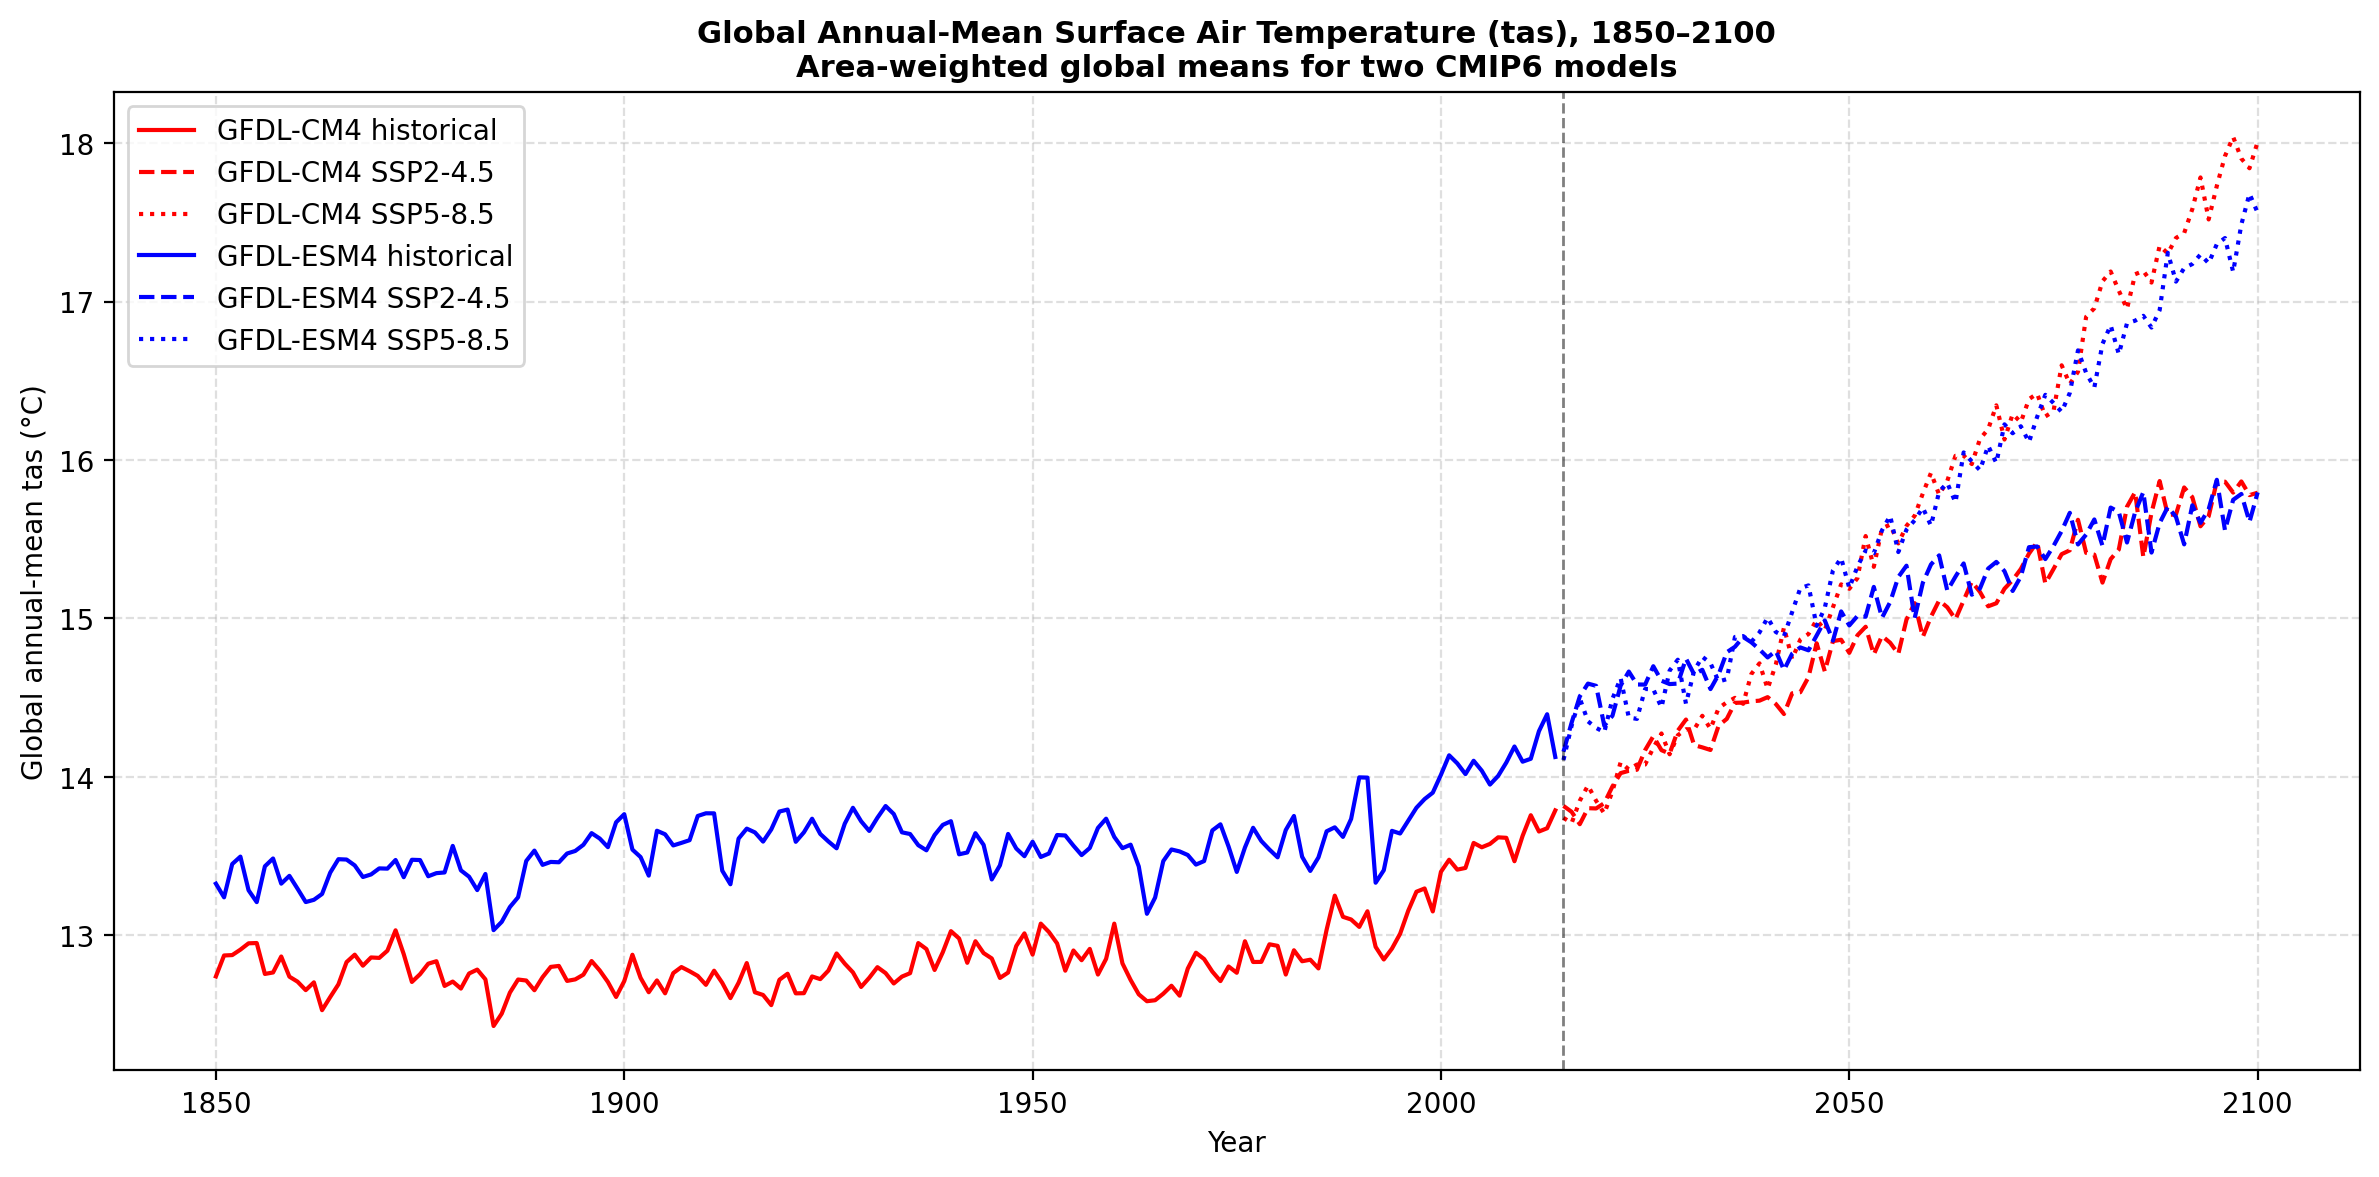

In [61]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(
    gfdl_cm4_H_global_annual["year"],
    gfdl_cm4_H_global_annual,
    color= 'red' ,
    linestyle="-",
    label="GFDL-CM4 historical"
)

ax.plot(
    gfdl_cm4_245_global_annual["year"],
    gfdl_cm4_245_global_annual,
    color= 'red' ,
    linestyle="--",
    label="GFDL-CM4 SSP2-4.5"
)

ax.plot(
   gfdl_cm4_585_global_annual["year"],
    gfdl_cm4_585_global_annual,
    color='red',
    linestyle=":",
    label="GFDL-CM4 SSP5-8.5"
)
ax.plot(
    gfdl_esm4_H_global_annual["year"],
   gfdl_esm4_H_global_annual,
    color= 'blue' ,
    linestyle="-",
    label="GFDL-ESM4 historical"
)

ax.plot(
    gfdl_esm4_245_global_annual["year"],
    gfdl_esm4_245_global_annual,
    color= 'blue' ,
    linestyle="--",
    label="GFDL-ESM4 SSP2-4.5"
)

ax.plot(
    gfdl_esm4_585_global_annual["year"],
    gfdl_esm4_585_global_annual,
    color='blue',
    linestyle=":",
    label="GFDL-ESM4 SSP5-8.5"
)

ax.set_ylabel("Global annual-mean tas (°C)")
ax.set_xlabel("Year")
ax.set_title(
    "Global Annual-Mean Surface Air Temperature (tas), 1850–2100\n"
    "Area-weighted global means for two CMIP6 models",
    fontsize=11,
    fontweight="bold",
    y=1
)
ax.axvline(2015, color="k", linewidth=1, linestyle="--", alpha=0.5)
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend()

plt.tight_layout()
plt.show()

In [62]:
def regional_annual_mean(df, global_weights,
                         lat_min, lat_max, lon_min, lon_max):

    # 1) Slice data to the region
    array_reg = df.sel(latitude=slice(lat_min, lat_max),
                      longitude=slice(lon_min, lon_max))

    # 2) Slice weights to the same region
    wt_array = global_weights.sel(latitude=slice(lat_min, lat_max),
                               longitude=slice(lon_min, lon_max))

    # 3) Renormalize weights so they sum to 1 within the region
    wtr_array =  wt_array /  wt_array.sum()

    # 4) Area-weighted monthly regional mean
    monthly_array = array_reg.weighted(wtr_array).mean(dim=("latitude", "longitude"))

    # 5) Convert to annual mean
    annual_array = monthly_array.groupby("time.year").mean("time") - 273.15
    annual_array.name = "regional_annual_t"

    return annual_array


In [63]:
WE_regional = regional_annual_mean(gfdl_cm4_H_tos, areacell_xarray_cm4_H,
                         35, 60, -10, 30)
WE_regiona_245 = regional_annual_mean(gfdl_cm4_24_tos, areacell_xarray_cm4_H,
                         35, 60, -10, 30)

In [64]:
SA_regional = regional_annual_mean(gfdl_cm4_H_tos, areacell_xarray_cm4_H,
                         5, 30, 65, 95)
SA_regional_245 = regional_annual_mean(gfdl_cm4_24_tos, areacell_xarray_cm4_H,
                         5, 30, 65, 95)

In [75]:
IND_regional = regional_annual_mean(gfdl_cm4_H_tos, areacell_xarray_cm4_H,
                         -10, 10, 95, 140)
IND_regional_245 = regional_annual_mean(gfdl_cm4_24_tos, areacell_xarray_cm4_H,
                         -10, 10, 95, 140)

In [66]:
SSA_regional = regional_annual_mean(gfdl_cm4_H_tos, areacell_xarray_cm4_H,
                         -35, -5, -20, 52)
SSA_regional_245 = regional_annual_mean(gfdl_cm4_24_tos, areacell_xarray_cm4_H,
                         -35, -5, -20, 52)

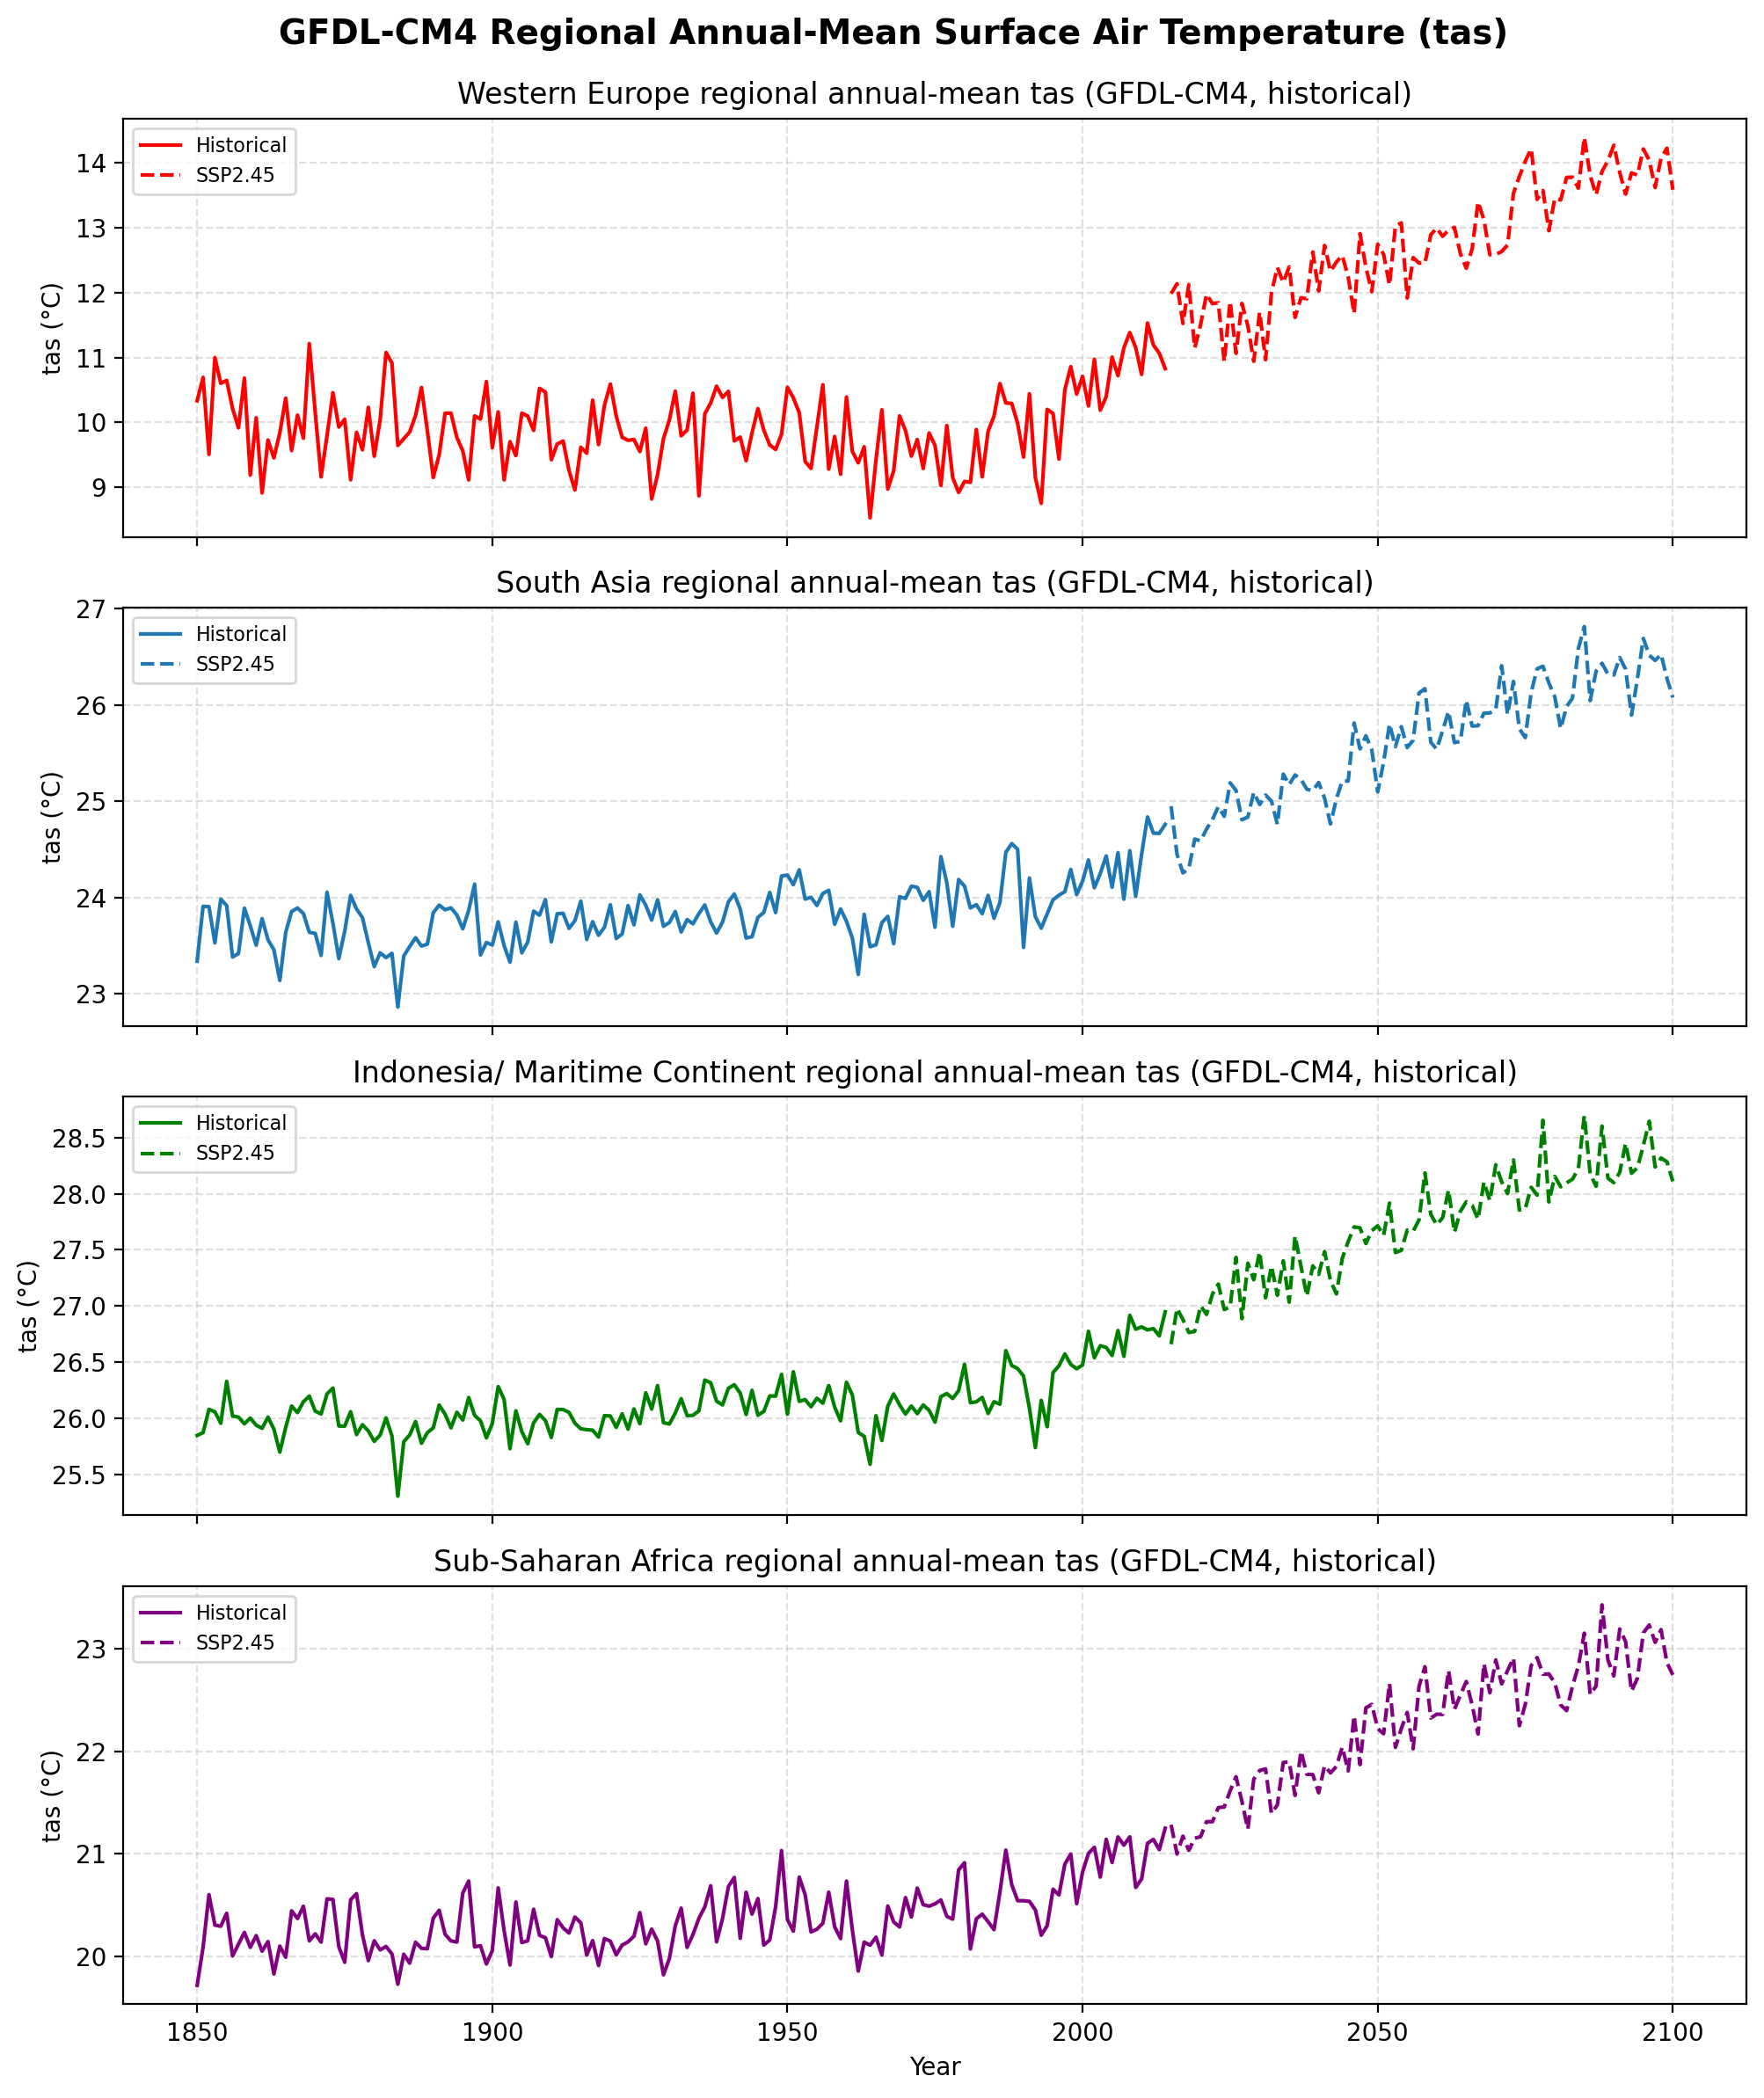

In [81]:


# === 4-panel layout: one region per row ===
fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows=4,
    ncols=1,
    figsize=(10, 12),
    sharex=True  # share the Year axis
)

# ---------- 1) Western Europe ----------
ax1.plot(
    WE_regional["year"],
    WE_regional,
    color="red",
    linestyle="-",
    label="Historical"
)
ax1.plot(
    WE_regiona_245["year"],
    WE_regiona_245,
    color="red",
    linestyle="--",
    label="SSP2.45"
)
ax1.set_ylabel("tas (°C)")
ax1.set_title("Western Europe regional annual-mean tas (GFDL-CM4, historical)")
ax1.grid(True, linestyle="--", alpha=0.4)
ax1.legend(loc="upper left", fontsize=8)

# ---------- 2) South Asia ----------

ax2.plot(
    SA_regional["year"],
    SA_regional,
    color="tab:blue",
    linestyle="-",
    label="Historical"
)

ax2.plot(
    SA_regional_245["year"],
    SA_regional_245,
    color="tab:blue",
    linestyle="--",
    label="SSP2.45"
)

ax2.set_ylabel("tas (°C)")
ax2.set_title("South Asia regional annual-mean tas (GFDL-CM4, historical)")
ax2.grid(True, linestyle="--", alpha=0.4)
ax2.legend(loc="upper left", fontsize=8)

# ---------- 3) Amazon Basin ----------

ax3.plot(
    IND_regional["year"],
    IND_regional,
    color="green",
    linestyle="-",
    label="Historical"
)

ax3.plot(
    IND_regional_245["year"],
    IND_regional_245,
    color="green",
    linestyle="--",
    label="SSP2.45"
)

ax3.set_ylabel("tas (°C)")
ax3.set_title("Indonesia/ Maritime Continent regional annual-mean tas (GFDL-CM4, historical)")
ax3.grid(True, linestyle="--", alpha=0.4)
ax3.legend(loc="upper left", fontsize=8)

# ---------- 4) Sub-Saharan Africa ----------

ax4.plot(
    SSA_regional["year"],
    SSA_regional,
    color="purple",
    linestyle="-",
    label="Historical"
)

ax4.plot(
    SSA_regional_245["year"],
    SSA_regional_245,
    color="purple",
    linestyle="--",
    label="SSP2.45"
)


ax4.set_ylabel("tas (°C)")
ax4.set_xlabel("Year")
ax4.set_title("Sub-Saharan Africa regional annual-mean tas (GFDL-CM4, historical)")
ax4.grid(True, linestyle="--", alpha=0.4)
ax4.legend(loc="upper left", fontsize=8)

# ---------- Big title for the whole figure ----------
fig.suptitle(
    "GFDL-CM4 Regional Annual-Mean Surface Air Temperature (tas)",
    fontsize=14,
    fontweight="bold",
    y=0.99
)

plt.tight_layout()
plt.show()


In [ ]:
def  SSA(array,vmin,vmax,cmap):
    
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw= dict(projection=ccrs.PlateCarree()))
 # Slice the array to the South Asia box
    array_ssa = array.sel(latitude=slice( 15 , -35), longitude=slice(-20,52))    
    array_ssa.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap,levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-20, 52, -35, 15], ccrs.PlateCarree())
    


    ax.add_feature(cfeature.BORDERS, linewidth=0.7)
    ax.coastlines()
    plt.show()

In [ ]:
tas_mean = gfdl_cm4_H_tos.mean("time")
south_asia(tas_mean, vmin=0, vmax=25, cmap="coolwarm")


In [ ]:
def to_celsius(da):
    if da.attrs.get("units", "").lower() in ["k", "kelvin"]:
        da = da - 273.15
        da.attrs["units"] = "degC"
    return da


In [ ]:

    regional_series_cm4_H[name] = regional_annual_mean(
        gfdl_cm4_H_tas,
        areacell_xarray_cm4_H,
        box["lat_min"], box["lat_max"],
        box["lon_min"], box["lon_max"]
    )
